# Drugs, Side Effects and Medical Condition

### 1. Import Library

In [12]:
import pandas as pd
import math
import random
import statistics
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


### 2. Load Dataset

In [13]:
df = pd.read_csv("drugs_side_effects_drugs_com.csv")

In [14]:
df.head()

,Unnamed: 0,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,0,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,0,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


### 3. Data Exploration

#### Summary Statistics

In [15]:
df.describe()

,Unnamed: 0,rating,no_of_reviews
count,2931.000000,1586.000000,1586.000000
mean,1465.000000,6.812926,75.064943
std,846.251145,2.313044,184.900847
min,0.000000,0.000000,1.000000
25%,732.500000,5.600000,2.000000
50%,1465.000000,7.000000,12.000000
75%,2197.500000,8.500000,58.000000
max,2930.000000,10.000000,2934.000000


In [16]:
print(f"Dimension of the dataset: {df.shape}\n")
cnt = 0
for i in df.columns:
    print(f"Mode in column {df.columns[cnt]}: {statistics.mode(df[df.columns[cnt]])}")
    cnt += 1
print("\n")

print(f"Data types of each column:\n{df.dtypes}\n")

Dimension of the dataset: (2931, 18)

Mode in column Unnamed: 0: 0
Mode in column drug_name: triamcinolone
Mode in column medical_condition: Pain
Mode in column side_effects: nan
Mode in column generic_name: nan
Mode in column drug_classes: Upper respiratory combinations
Mode in column brand_names: nan
Mode in column activity: 0%
Mode in column rx_otc: Rx
Mode in column pregnancy_category: C
Mode in column csa: N
Mode in column alcohol: 0
Mode in column related_drugs: nan
Mode in column medical_condition_description: Pain An unpleasant sensory and emotional experience associated with actual or potential tissue damage or described in terms of such damage.
Mode in column rating: 10.0
Mode in column no_of_reviews: 1.0
Mode in column drug_link: https://www.drugs.com/doxycycline.html
Mode in column medical_condition_url: https://www.drugs.com/condition/pain.html


Data types of each column:
Unnamed: 0                         int64
drug_name                         object
medical_condition  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     2931 non-null   int64  
 1   drug_name                      2931 non-null   object 
 2   medical_condition              2931 non-null   object 
 3   side_effects                   2807 non-null   object 
 4   generic_name                   2888 non-null   object 
 5   drug_classes                   2849 non-null   object 
 6   brand_names                    1718 non-null   object 
 7   activity                       2931 non-null   object 
 8   rx_otc                         2930 non-null   object 
 9   pregnancy_category             2931 non-null   object 
 10  csa                            2931 non-null   object 
 11  alcohol                        2931 non-null   object 
 12  related_drugs                  1462 non-null   o

Unnamed: 0                          0
drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                  0
csa                                 0
alcohol                             0
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64

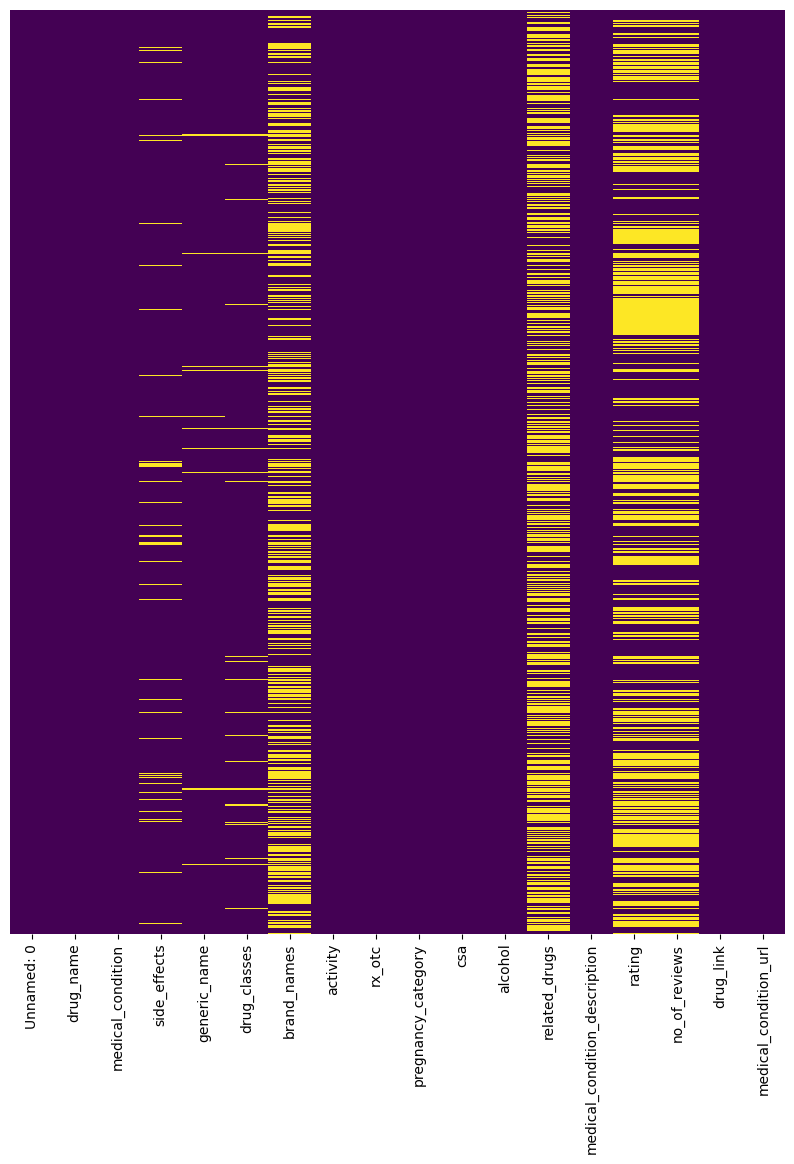

In [17]:
df.info()
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(df.any())
# list all duplicate rows

print("Duplicate Rows",df[dups])
#Cardinality 
df.nunique()
#Lets now check for null fields
plt.figure(figsize=(10,12))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df.isnull().sum()

In [18]:
df.dtypes 

Unnamed: 0                         int64
drug_name                         object
medical_condition                 object
side_effects                      object
generic_name                      object
drug_classes                      object
brand_names                       object
activity                          object
rx_otc                            object
pregnancy_category                object
csa                               object
alcohol                           object
related_drugs                     object
medical_condition_description     object
rating                           float64
no_of_reviews                    float64
drug_link                         object
medical_condition_url             object
dtype: object

In [19]:
df.columns

Index(['Unnamed: 0', 'drug_name', 'medical_condition', 'side_effects',
       'generic_name', 'drug_classes', 'brand_names', 'activity', 'rx_otc',
       'pregnancy_category', 'csa', 'alcohol', 'related_drugs',
       'medical_condition_description', 'rating', 'no_of_reviews', 'drug_link',
       'medical_condition_url'],
      dtype='object')

In [20]:
columns_to_be_modified = ['pregnancy_category', 'alcohol']

# Every other attributes with null values is indication that the data is not available

for i in df.index:
    for j in columns_to_be_modified:
        check_ = df[j].isnull()
        if check_[i] == True:
            df.loc[i, j] = 0
            
df

,Unnamed: 0,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,0,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,0,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,benzphetamine,Weight Loss,hives ; difficulty breathing; swelling of your...,benzphetamine,"Anorexiants, CNS stimulants","Didrex, Regimex",2%,Rx,X,3,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,7.5,17.0,https://www.drugs.com/mtm/benzphetamine.html,https://www.drugs.com/condition/obesity.html
2927,2927,fenfluramine,Weight Loss,hives ; difficult breathing; swelling of your ...,fenfluramine,"Anorexiants, CNS stimulants, Miscellaneous ant...",Fintepla,1%,Rx,C,4,X,NaN,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/mtm/fenfluramine.html,https://www.drugs.com/condition/obesity.html
2928,2928,Fendique ER,Weight Loss,NaN,phendimetrazine tartrate,"Anorexiants, CNS stimulants",NaN,0%,Rx,C,3,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/pro/fendique-er.html,https://www.drugs.com/condition/obesity.html
2929,2929,Imcivree,Weight Loss,"Imcivree may cause serious side effects, inclu...",setmelanotide,Melanocortin receptor agonists,NaN,0%,Rx,0,N,0,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,NaN,NaN,https://www.drugs.com/imcivree.html,https://www.drugs.com/condition/obesity.html


#### Descriptive Analytics

In [21]:
# Group data accordingly
unique_medical_conditions = list(df.medical_condition.unique())
unique_drugs = list(df.drug_name.unique())

print(f"List of unique Medical Conditions being discussed are:\n{unique_medical_conditions}\n\n")
print(f"List of unique drugs being discussed are:\n{unique_drugs}\n\n")

print(f"Number of unique drugs: {len(unique_drugs)}")
print(f"Total data rows: {df.shape[0]}")

List of unique Medical Conditions being discussed are:
['Acne', 'ADHD', 'AIDS/HIV', 'Allergies', "Alzheimer's", 'Angina', 'Anxiety', 'Asthma', 'Bipolar Disorder', 'Bronchitis', 'Cancer', 'Cholesterol', 'Colds & Flu', 'Constipation', 'COPD', 'Covid 19', 'Depression', 'Diabetes (Type 1)', 'Diabetes (Type 2)', 'Diarrhea', 'Eczema', 'Erectile Dysfunction', 'Gastrointestinal', 'GERD (Heartburn)', 'Gout', 'Hair Loss', 'Hayfever', 'Herpes', 'Hypertension', 'Hypothyroidism', 'IBD (Bowel)', 'Incontinence', 'Insomnia', 'Menopause', 'Migraine', 'Osteoarthritis', 'Osteoporosis', 'Pain', 'Pneumonia', 'Psoriasis', 'Rheumatoid Arthritis', 'Schizophrenia', 'Seizures', 'Stroke', 'Swine Flu', 'UTI', 'Weight Loss']


List of unique drugs being discussed are:
['doxycycline', 'spironolactone', 'minocycline', 'Accutane', 'clindamycin', 'Aldactone', 'tretinoin', 'isotretinoin', 'Bactrim', 'Retin-A', 'Aczone', 'benzoyl peroxide', 'Differin', 'Epiduo', 'adapalene', 'cephalexin', 'Doryx', 'tetracycline', 'Septr

In [22]:
# Drugs being used for multiple medical conditions
drugs_multiple_condns = []
drugs_so_far = []

for i in df.index:
    if df["drug_name"][i] in drugs_so_far and df["drug_name"][i] not in drugs_multiple_condns:
        drugs_multiple_condns.append(df["drug_name"][i])
    if df["drug_name"][i] not in drugs_so_far:
        drugs_so_far.append(df["drug_name"][i])

print("The below is the list of only drugs that have multi-purpose:")
for i in drugs_multiple_condns:
    print(i)

The below is the list of only drugs that have multi-purpose:
minocycline
erythromycin
triamcinolone
fluocinolone
doxepin
fluticasone
mometasone
beclomethasone
ciclesonide
acyclovir
minoxidil
budesonide
hydrocortisone
cromolyn
diclofenac
diphenhydramine
clindamycin
betamethasone


### 4. Data Cleaning

#### Handling Missing values

In [23]:
df.isnull()

,Unnamed: 0,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2927,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False
2928,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False
2929,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False


In [24]:
df.isnull().sum()

Unnamed: 0                          0
drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                  0
csa                                 0
alcohol                             0
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64

In [25]:
# Fill text-based fields with 'Unknown'
text_cols = ['side_effects', 'generic_name', 'drug_classes', 'brand_names', 
             'pregnancy_category', 'alcohol', 'related_drugs']
df[text_cols] = df[text_cols].fillna('Unknown')

# Fill 'rx_otc' with mode (most frequent value)
df['rx_otc'] = df['rx_otc'].fillna(df['rx_otc'].mode()[0])

# Fill numeric fields like 'rating' and 'no_of_reviews' with median
df['rating'] = df['rating'].fillna(df['rating'].median())
df['no_of_reviews'] = df['no_of_reviews'].fillna(df['no_of_reviews'].median())

# Check if all missing values are handled
print(df.isnull().sum())


Unnamed: 0                       0
drug_name                        0
medical_condition                0
side_effects                     0
generic_name                     0
drug_classes                     0
brand_names                      0
activity                         0
rx_otc                           0
pregnancy_category               0
csa                              0
alcohol                          0
related_drugs                    0
medical_condition_description    0
rating                           0
no_of_reviews                    0
drug_link                        0
medical_condition_url            0
dtype: int64


In [26]:
# Drop missing values in side_effects column
side_effects_data = df['side_effects'].dropna()

# Flatten and clean all side effects into one list
all_effects = []
for entry in side_effects_data:
    effects = [effect.strip().lower() for effect in entry.split(',')]
    all_effects.extend(effects)

# Count occurrences of each side effect
side_effect_counts = Counter(all_effects)

# Get the top 10 most common side effects
top_side_effects = side_effect_counts.most_common(10)

# Display as a list
print("Top 10 Most Common Side Effects:")
for effect, count in top_side_effects:
    print(f"{effect.title()} — {count} occurrences")

Top 10 Most Common Side Effects:
Lips — 2273 occurrences
Tongue — 2129 occurrences
Vomiting — 942 occurrences
Hives ; Difficult Breathing; Swelling Of Your Face — 937 occurrences
Itching — 695 occurrences
Nausea — 665 occurrences
Face — 523 occurrences
Diarrhea — 435 occurrences
Dark Urine — 433 occurrences
Loss Of Appetite — 423 occurrences


In [27]:
df = df.drop(['csa', 'drug_link', 'medical_condition_url'], axis=1)
df

,Unnamed: 0,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews
0,0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0
1,1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0
2,2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,0,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0
3,3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",Unknown,41%,Rx,X,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0
4,4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,0,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,benzphetamine,Weight Loss,hives ; difficulty breathing; swelling of your...,benzphetamine,"Anorexiants, CNS stimulants","Didrex, Regimex",2%,Rx,X,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,7.5,17.0
2927,2927,fenfluramine,Weight Loss,hives ; difficult breathing; swelling of your ...,fenfluramine,"Anorexiants, CNS stimulants, Miscellaneous ant...",Fintepla,1%,Rx,C,X,Unknown,Weight Loss (Obesity/Overweight) More than hal...,7.0,12.0
2928,2928,Fendique ER,Weight Loss,Unknown,phendimetrazine tartrate,"Anorexiants, CNS stimulants",Unknown,0%,Rx,C,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,7.0,12.0
2929,2929,Imcivree,Weight Loss,"Imcivree may cause serious side effects, inclu...",setmelanotide,Melanocortin receptor agonists,Unknown,0%,Rx,0,0,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,7.0,12.0


In [28]:
# Remove any empty values
data = df
data = data.dropna(axis=0)
data

,Unnamed: 0,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews
0,0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0
1,1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0
2,2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,0,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0
3,3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",Unknown,41%,Rx,X,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0
4,4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,0,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,benzphetamine,Weight Loss,hives ; difficulty breathing; swelling of your...,benzphetamine,"Anorexiants, CNS stimulants","Didrex, Regimex",2%,Rx,X,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,7.5,17.0
2927,2927,fenfluramine,Weight Loss,hives ; difficult breathing; swelling of your ...,fenfluramine,"Anorexiants, CNS stimulants, Miscellaneous ant...",Fintepla,1%,Rx,C,X,Unknown,Weight Loss (Obesity/Overweight) More than hal...,7.0,12.0
2928,2928,Fendique ER,Weight Loss,Unknown,phendimetrazine tartrate,"Anorexiants, CNS stimulants",Unknown,0%,Rx,C,X,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,7.0,12.0
2929,2929,Imcivree,Weight Loss,"Imcivree may cause serious side effects, inclu...",setmelanotide,Melanocortin receptor agonists,Unknown,0%,Rx,0,0,phentermine: https://www.drugs.com/phentermine...,Weight Loss (Obesity/Overweight) More than hal...,7.0,12.0


### 5. Distribution Ratings

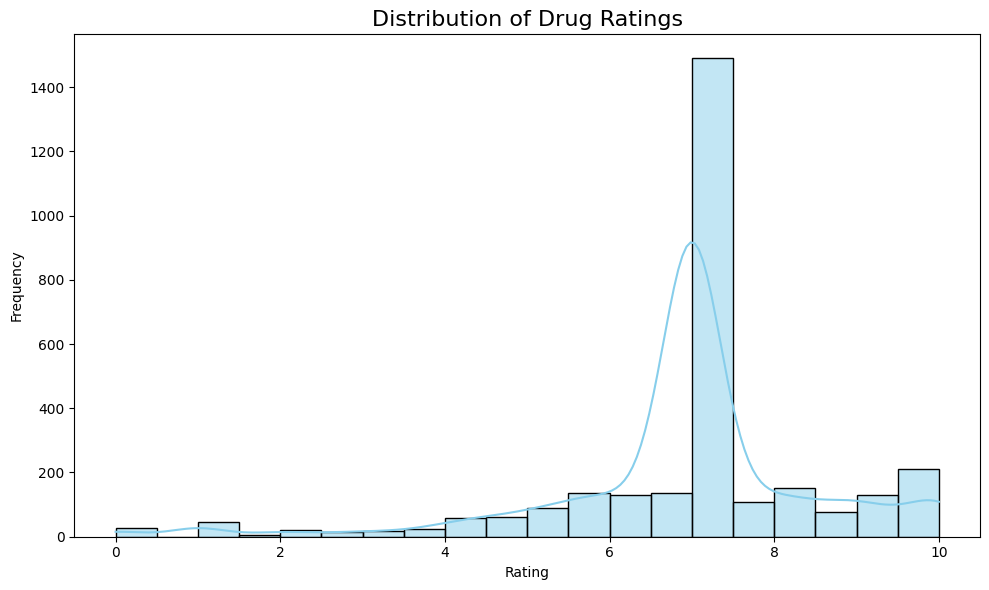

In [29]:
# Create histogram of the 'rating' column
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True, color='skyblue')

# Set chart title and labels
plt.title('Distribution of Drug Ratings', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

### 6.Analyzing Relationships

#### Top Drugs by Condition

In [30]:
# Group data by condition and drug name to get average rating and review count
top_drugs_by_condition = (
    df.groupby(['medical_condition', 'drug_name'])[['rating', 'no_of_reviews']]
    .mean()
    .reset_index()
)

# Sort to get top-rated and most-reviewed drugs per condition
top_drugs = top_drugs_by_condition.sort_values(
    by=['medical_condition', 'rating', 'no_of_reviews'],
    ascending=[True, False, False]
)

# View top 10 rows as example
print(top_drugs.head(10))


   medical_condition          drug_name  rating  no_of_reviews
53              ADHD         selegiline    10.0            2.0
24              ADHD          ProCentra     9.5            2.0
10              ADHD            Desoxyn     9.4           35.0
49              ADHD    methamphetamine     8.8           52.0
18              ADHD          Jornay PM     8.7            3.0
11              ADHD          Dexedrine     8.6           93.0
22              ADHD        Methylin ER     8.5            8.0
45              ADHD  dextroamphetamine     8.3          194.0
9               ADHD           Daytrana     8.3           73.0
21              ADHD           Methylin     8.2           14.0


#### Side Effects Analysis

In [31]:
side_effects = df['side_effects'].value_counts().head(10)
print(side_effects)

Unknown                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         124
hives ; difficult breathing; swelling of your face, lips, tongue, or throat. This medicine may cause serious side effects. Stop using this medicine and call your doctor at once if you have: redness or swelling of the treated area; increased pain; or severe burning or skin irritation such as a rash, itching, pain, or blistering. Less serious side effects may be more likely, and you may have none at all

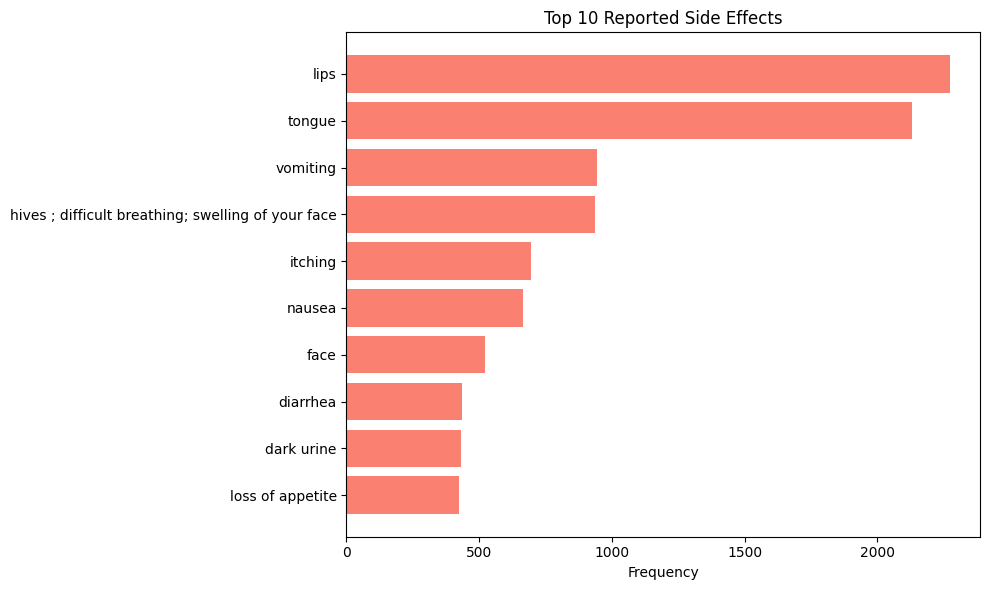

In [32]:
# Drop missing values in 'side_effects' column
side_effects = df['side_effects'].dropna()

# Split side effects by comma and flatten the list
all_effects = [effect.strip().lower() for sublist in side_effects.str.split(',') for effect in sublist]

# Count frequency using Counter
side_effect_counts = Counter(all_effects)

# Get top 10 most common side effects
top_effects = side_effect_counts.most_common(10)

# Convert to DataFrame for plotting
effects_df = pd.DataFrame(top_effects, columns=['Side Effect', 'Count'])

# Plot
plt.figure(figsize=(10, 6))
plt.barh(effects_df['Side Effect'], effects_df['Count'], color='salmon')
plt.xlabel('Frequency')
plt.title('Top 10 Reported Side Effects')
plt.gca().invert_yaxis()  # Most frequent on top
plt.tight_layout()
plt.show()

####  Boxplot

C:\Users\SHREYASH\AppData\Local\Temp\ipykernel_17592\2657863096.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


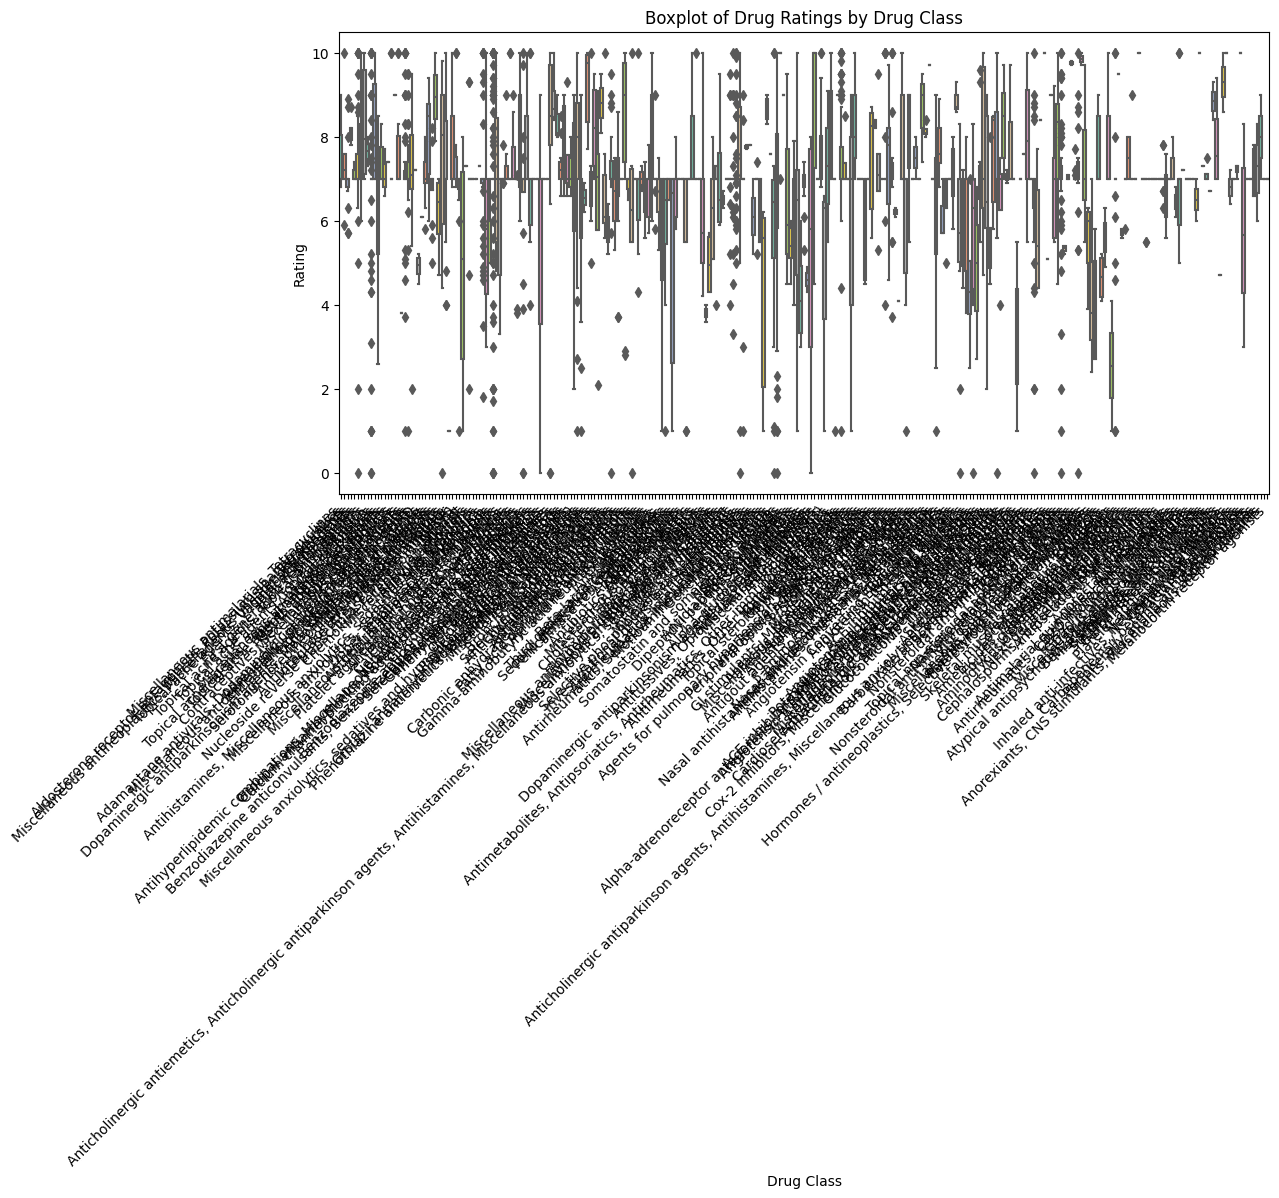

In [33]:
# Drop missing values for clean plotting
df_clean = df.dropna(subset=['rating', 'drug_classes'])

# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='drug_classes', y='rating', data=df_clean, palette='Set2')

# Formatting
plt.title('Boxplot of Drug Ratings by Drug Class')
plt.xlabel('Drug Class')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Medical Conditions vs Number of Drugs available

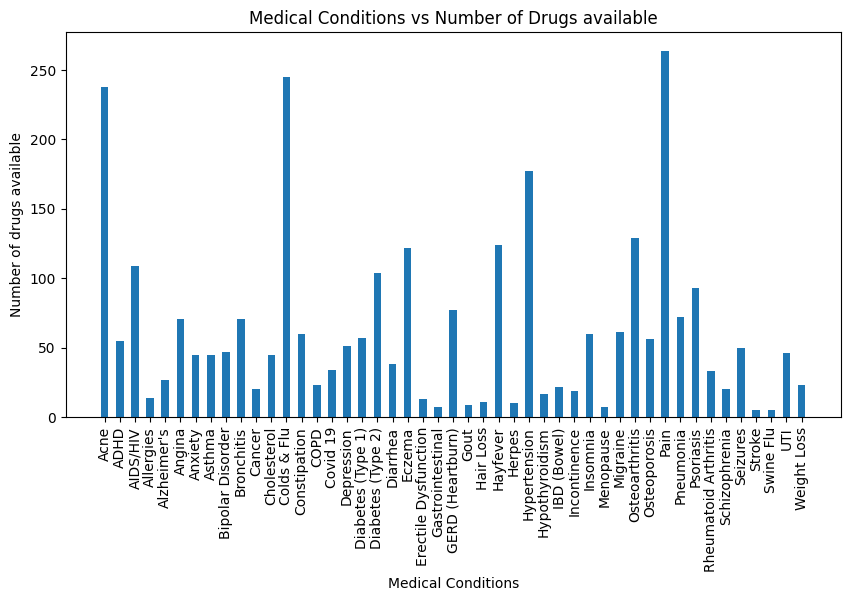

In [34]:
available_drugs_for_condns = [0]*len(unique_medical_conditions)

for i in data.index:
    medical_condition = str(data['medical_condition'][i])
    indexx = unique_medical_conditions.index(medical_condition)
    available_drugs_for_condns[indexx] += 1

#Bar Graph
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(unique_medical_conditions, available_drugs_for_condns, width = 0.5)
plt.xlabel("Medical Conditions")
plt.ylabel(f"Number of drugs available")
plt.title(f"Medical Conditions vs Number of Drugs available")
plt.xticks(rotation=90)
plt.show()

#### Medical Conditions vs Number of Drugs available - Sorted

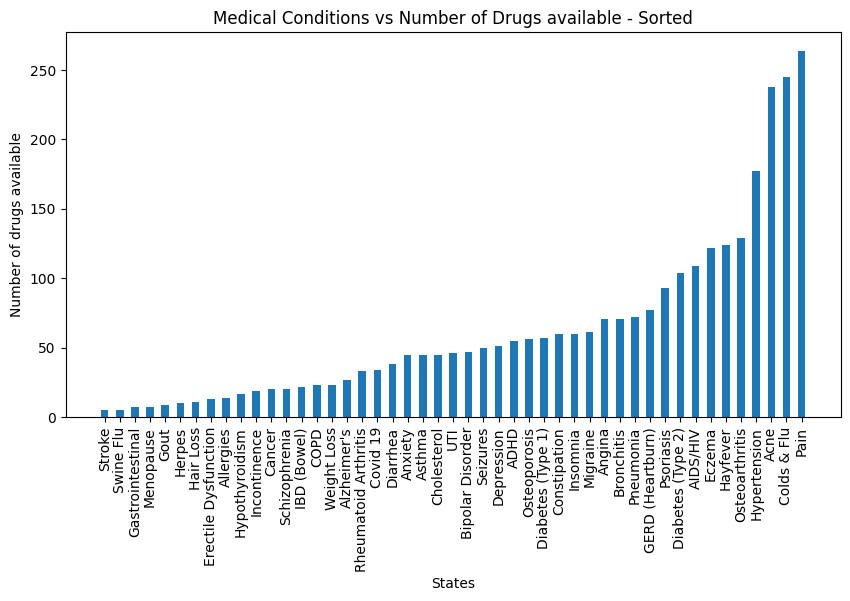

In [35]:
# Pareto Chart
available_drugs_for_condns, unique_medical_conditions = zip(*sorted(zip(available_drugs_for_condns, unique_medical_conditions)))

#Bar Graph
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(unique_medical_conditions, available_drugs_for_condns, width = 0.5)
plt.xlabel("States")
plt.ylabel(f"Number of drugs available")
plt.title(f"Medical Conditions vs Number of Drugs available - Sorted")
plt.xticks(rotation=90)
plt.show()

#### Top Prescribed Drugs for Pain

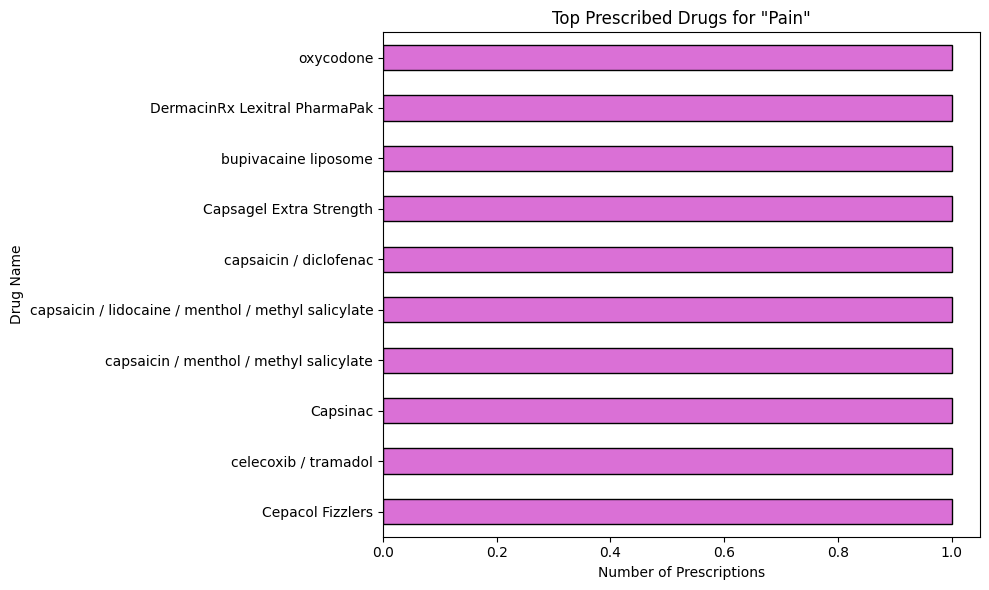

In [36]:
condition_filter = 'Pain'
condition_df = df[df['medical_condition'].str.lower() == condition_filter.lower()]

# Count how many times each drug was prescribed for this condition
top_drugs = condition_df['drug_name'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
top_drugs.plot(kind='barh', color='orchid', edgecolor='black')
plt.title(f'Top Prescribed Drugs for "{condition_filter}"')
plt.xlabel('Number of Prescriptions')
plt.ylabel('Drug Name')
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()

#### Top 10 Conditions by Number of Reviews

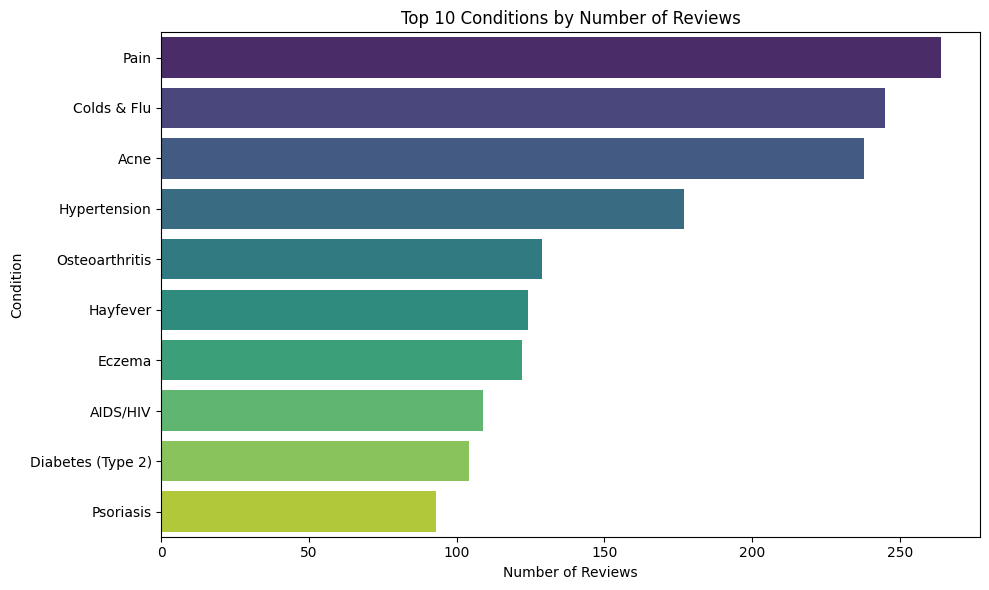

In [37]:
top_conditions = df['medical_condition'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_conditions.values, y=top_conditions.index, palette="viridis")
plt.title("Top 10 Conditions by Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Condition")
plt.tight_layout()
plt.show()

#### Number of Reviews vs Average Rating

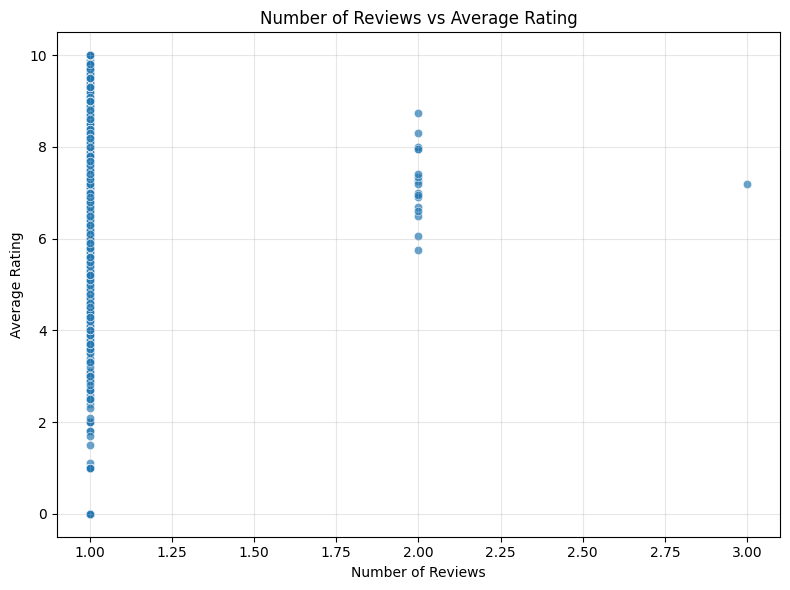

In [38]:
reviews_per_drug = df.groupby('drug_name').agg({'rating': ['mean', 'count']})
reviews_per_drug.columns = ['avg_rating', 'num_reviews']
reviews_per_drug = reviews_per_drug.reset_index()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=reviews_per_drug, x='num_reviews', y='avg_rating', alpha=0.7)
plt.title("Number of Reviews vs Average Rating")
plt.xlabel("Number of Reviews")
plt.ylabel("Average Rating")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

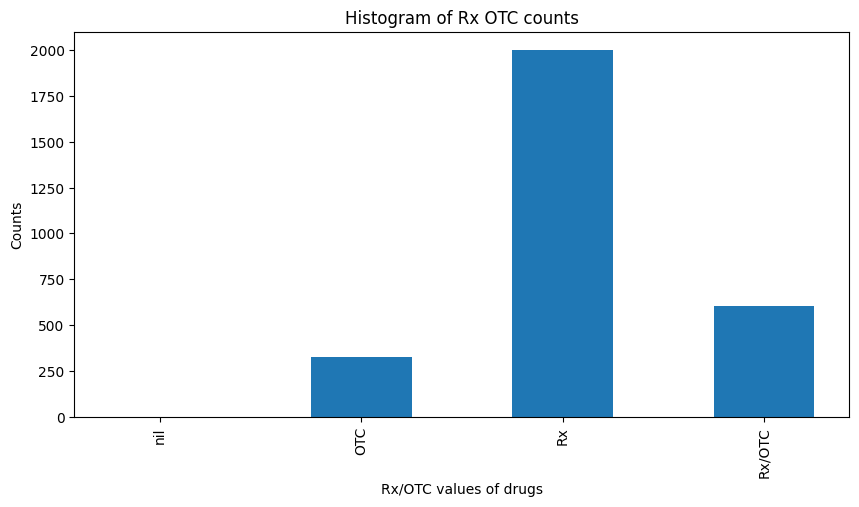

In [39]:
unique_rx_otc = ['nil', 'OTC', 'Rx', 'Rx/OTC']

cnts_rtx_otc = [0]*len(unique_rx_otc)
for i in df.index:
    if df["rx_otc"][i] == None:
        cnts_rtx_otc[0] += 1
    elif df["rx_otc"][i] == 'OTC':
        cnts_rtx_otc[1] += 1
    elif df["rx_otc"][i] == 'Rx':
        cnts_rtx_otc[2] += 1
    elif df["rx_otc"][i] == 'Rx/OTC':
        cnts_rtx_otc[3] += 1
        
# Pareto Chart
# cnts, unique_rx_otc = zip(*sorted(zip(cnts, unique_rx_otc)))

#Bar Graph
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(unique_rx_otc, cnts_rtx_otc, width = 0.5)
plt.xlabel("Rx/OTC values of drugs")
plt.ylabel(f"Counts")
plt.title(f"Histogram of Rx OTC counts")
plt.xticks(rotation=90)
plt.show()

### 7.Piecharts

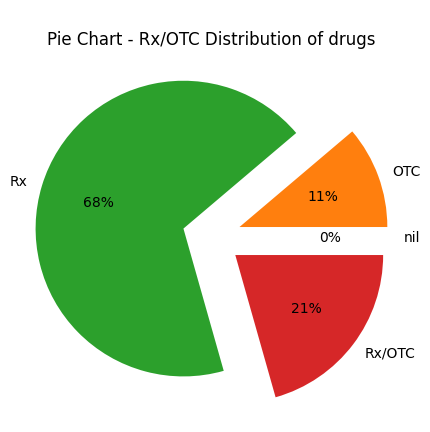

In [40]:
# Rx/OTC distributions
y = np.array(cnts_rtx_otc)
mylabels = unique_rx_otc
myexplode = [0.2]*len(unique_rx_otc)
plt.title("\nPie Chart - Rx/OTC Distribution of drugs")
plt.pie(y, labels = mylabels, explode = myexplode, autopct='%.0f%%')
plt.show() 

C    1382
B     509
N     436
0     229
D     228
X     129
A      18
Name: pregnancy_category, dtype: int64

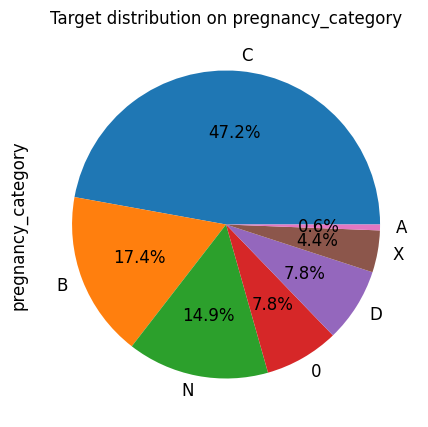

In [41]:
# Figure size 
sns.set_context('poster', font_scale=0.5)
plt.figure(figsize=(5,5))
# Pie plot
data['pregnancy_category'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':12}).set_title("Target distribution on pregnancy_category")
data['pregnancy_category'].value_counts()

Pain                    264
Colds & Flu             245
Acne                    238
Hypertension            177
Osteoarthritis          129
Hayfever                124
Eczema                  122
AIDS/HIV                109
Diabetes (Type 2)       104
Psoriasis                93
GERD (Heartburn)         77
Pneumonia                72
Angina                   71
Bronchitis               71
Migraine                 61
Insomnia                 60
Constipation             60
Diabetes (Type 1)        57
Osteoporosis             56
ADHD                     55
Depression               51
Seizures                 50
Bipolar Disorder         47
UTI                      46
Asthma                   45
Anxiety                  45
Cholesterol              45
Diarrhea                 38
Covid 19                 34
Rheumatoid Arthritis     33
Alzheimer's              27
Weight Loss              23
COPD                     23
IBD (Bowel)              22
Cancer                   20
Schizophrenia       

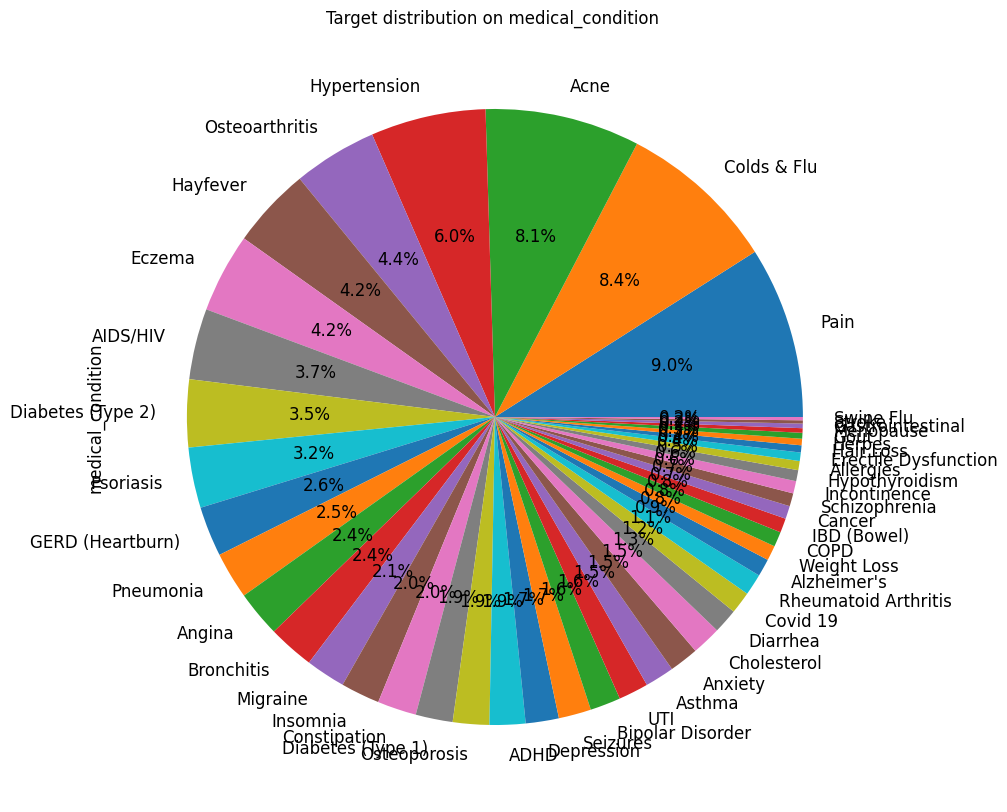

In [42]:
# Figure size 
sns.set_context('poster', font_scale=0.5)
plt.figure(figsize=(10,10))
# Pie plot
data['medical_condition'].value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':12}).set_title("Target distribution on medical_condition ")
data['medical_condition'].value_counts()

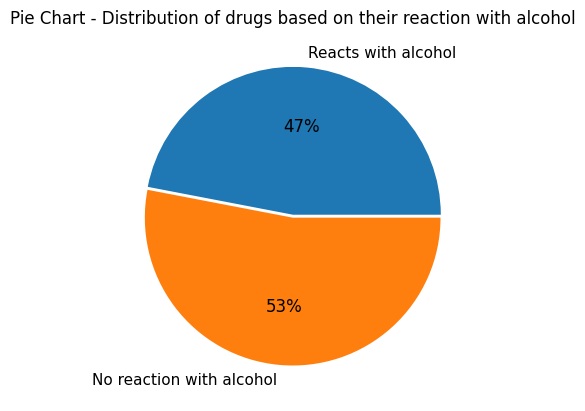

In [43]:
# Alcohol
cnts = 0

for i in df.index:
    if df["alcohol"][i] == 'X':
        cnts += 1
cnts_alcohol = [cnts, df.shape[0] - cnts]
mylabels = ["Reacts with alcohol", "No reaction with alcohol"]

# Alcohol
y = np.array(cnts_alcohol)
# mylabels = unique_rx_otc
myexplode = [0.01]*2
plt.title("Pie Chart - Distribution of drugs based on their reaction with alcohol")
plt.pie(y, labels = mylabels, explode = myexplode, autopct='%.0f%%')
plt.show() 

### 8. Model Selection

In [50]:
# Create rating category
df['rating_category'] = pd.cut(df['rating'], bins=[0, 4, 7, 10], labels=['Low', 'Medium', 'High'])

# Drop NA
df_ml = df[['medical_condition', 'drug_classes', 'side_effects', 'rating_category']].dropna()

In [45]:
# Encode categorical features
le_condition = LabelEncoder()
le_class = LabelEncoder()

df_ml['condition_enc'] = le_condition.fit_transform(df_ml['medical_condition'])
df_ml['classes_enc'] = le_class.fit_transform(df_ml['drug_classes'])

In [46]:
# Features and target
X = df_ml[['condition_enc', 'classes_enc']]
y = df_ml['rating_category']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.55      0.31      0.40       158
         Low       0.50      0.09      0.15        33
      Medium       0.72      0.90      0.80       390

    accuracy                           0.69       581
   macro avg       0.59      0.43      0.45       581
weighted avg       0.66      0.69      0.65       581



### 9. Save Cleaned Data

In [49]:
df.to_csv('drugs_side_effects_drugs_com.csv')